In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
np.random.seed(100)
n_samples = 25
student_ids = np.arange(1001, 1001 + n_samples)
courses = ['CSE', 'ECE', 'IOT', 'IT', 'ADS']
ug_courses = np.random.choice(courses, n_samples)

In [3]:
data = {
    'Student ID': student_ids,
    'Height (cm)': np.random.randint(150, 191, n_samples),
    'Weight (kg)': np.random.randint(45, 91, n_samples),
    'UG Course': ug_courses,
    'UG CGPA': np.round(np.random.uniform(6.0, 10.0, n_samples), 2)
}

df = pd.DataFrame(data)
df.to_csv("student_profile_dataset.csv", index=False)

In [4]:
df.head()

,Student ID,Height (cm),Weight (kg),UG Course,UG CGPA
0,1001,163,58,CSE,6.95
1,1002,169,87,CSE,6.18
2,1003,186,75,IT,8.02
3,1004,154,62,CSE,7.51
4,1005,177,49,IOT,8.37


In [5]:
features_to_normalize = ['Height (cm)', 'Weight (kg)', 'UG CGPA']
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(df[features_to_normalize])

df_normalized = pd.concat(
    [df[['Student ID', 'UG Course']],
     pd.DataFrame(normalized_values, columns=features_to_normalize)],
    axis=1
)

In [6]:
df_normalized.head()

,Student ID,UG Course,Height (cm),Weight (kg),UG CGPA
0,1001,CSE,0.333333,0.302326,0.208672
1,1002,CSE,0.487179,0.976744,0.000000
2,1003,IT,0.923077,0.697674,0.498645
3,1004,CSE,0.102564,0.395349,0.360434
4,1005,IOT,0.692308,0.093023,0.593496


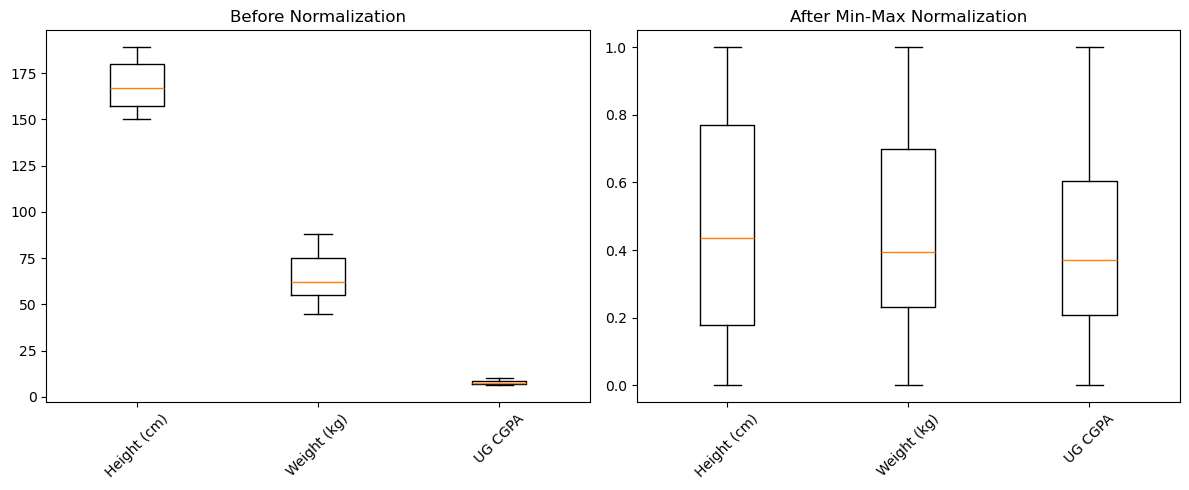

In [7]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.boxplot(df[features_to_normalize].values, labels=features_to_normalize)
plt.title("Before Normalization")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.boxplot(df_normalized[features_to_normalize].values, labels=features_to_normalize)
plt.title("After Min-Max Normalization")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()